In [1]:
import pandas as pd
import scipy as sc
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
anime_df = pd.read_csv('anime_df_copy_csv')
anime_df

,anime_name,Format,Number Of Episodes,Episode Duration,status,Popularity,favorites,Studios,Genres,mean_score,source,Creator,Completed,Current,Planning,Paused,Dropped,mean_score_binned
0,Shingeki no Kyojin,1.0,25.0,24,Finished,522270.0,47674.0,Wit Studio,Action|Drama|Fantasy|Mystery,85.0,1.0,Hajime Isayama,436995.0,30979.0,36842.0,9191.0,8263.0,9
1,DEATH NOTE,1.0,37.0,23,Finished,474846.0,35688.0,MADHOUSE,Mystery|Psychological|Supernatural|Thriller,84.0,1.0,Tsugumi Ooba,369357.0,26960.0,47004.0,16808.0,14717.0,9
2,Boku no Hero Academia,1.0,13.0,24,Finished,471660.0,23789.0,bones,Action|Adventure|Comedy,79.0,1.0,Kouhei Horikoshi,388606.0,29172.0,39132.0,7484.0,7266.0,8
3,Kimetsu no Yaiba,1.0,26.0,24,Finished,468624.0,40432.0,ufotable,Action|Adventure|Drama|Fantasy|Supernatural,85.0,1.0,Koyoharu Gotouge,362290.0,41180.0,48672.0,9883.0,6599.0,9
4,HUNTER×HUNTER (2011),1.0,148.0,24,Finished,433766.0,56845.0,MADHOUSE,Action|Adventure|Fantasy,90.0,1.0,Yoshihiro Togashi,258701.0,65347.0,72050.0,28800.0,8868.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,NOMAD: Megalo Box 2 - Hachidori to tabibito.,3.0,1.0,0,Finished,1225.0,11.0,XX,XX,72.0,3.0,XX,81.0,73.0,1046.0,16.0,9.0,8
5944,The Big O (2003),1.0,13.0,24,Finished,1225.0,54.0,Sunrise,Action|Mecha|Mystery|Psychological|Sci-Fi,73.0,3.0,Hajime Yatate,818.0,55.0,326.0,17.0,9.0,8
5945,Zoids Wild,1.0,50.0,25,Finished,1225.0,10.0,OLM,Action|Adventure|Mecha|Sci-Fi,51.0,3.0,Norihiko Sudo,157.0,135.0,621.0,87.0,225.0,6
5946,Sanctuary,4.0,1.0,67,Finished,1225.0,9.0,Pastel,Action|Drama|Thriller,58.0,1.0,Yoshiyuki Okamura,503.0,18.0,672.0,16.0,16.0,6


In [3]:
#Creating a separate Dataset of the genres
Action=[0] * anime_df.shape[0]
Adventure=[0] * anime_df.shape[0]
Comedy=[0] * anime_df.shape[0]
Drama=[0] * anime_df.shape[0]
Ecchi=[0] * anime_df.shape[0]
Fantasy=[0] * anime_df.shape[0]
Horror=[0] * anime_df.shape[0]
Mahou_Shoujo=[0] * anime_df.shape[0]
Mecha=[0] * anime_df.shape[0]
Music=[0] * anime_df.shape[0]
Mystery=[0] * anime_df.shape[0]
Psychological=[0] * anime_df.shape[0]
Romance=[0] * anime_df.shape[0]
Sci_Fi=[0] * anime_df.shape[0]
Slice_of_Life=[0] * anime_df.shape[0]
Sports=[0] * anime_df.shape[0]
Supernatural=[0] * anime_df.shape[0]
Thriller=[0] * anime_df.shape[0]

genres_list=[Action,Adventure,Comedy,Drama,Ecchi,Fantasy,
             Horror,Mahou_Shoujo,Mecha,Music,Mystery,Psychological,
             Romance,Sci_Fi,Slice_of_Life,Sports,Supernatural,Thriller]


In [30]:
for i,row in anime_df.iterrows():
    try:
        x = row['Genres'].replace(' ','_').replace('-','_').split('|')
        for it in x:
            globals()[it][i] = 1
    except:
        pass


genres_data = {"Action":Action,"Adventure":Adventure,"Comedy":Comedy,"Drama":Drama,
               "Ecchi":Ecchi,"Fantasy":Fantasy,"Horror":Horror,"Mahou_Shoujo":Mahou_Shoujo,
               "Mecha":Mecha,"Music":Music,"Mystery":Mystery,"Psychological":Psychological,
               "Romance":Romance,"Sci_Fi":Sci_Fi,"Slice_of_Life":Slice_of_Life,"Sports":Sports,
               "Supernatural":Supernatural,"Thriller":Thriller}

genres_df = pd.DataFrame(genres_data)
genres_df
genres_df.to_csv('Genre_csv')

In [5]:
genre_sums = genres_df.sum(axis = 0, skipna = True)
genre_sums
#The numbers of our genres appearances

Action           2214
Adventure        1345
Comedy           2815
Drama            1615
Ecchi             634
Fantasy          1518
Horror            264
Mahou_Shoujo      199
Mecha             476
Music             259
Mystery           535
Psychological     344
Romance          1360
Sci_Fi           1269
Slice_of_Life    1156
Sports            359
Supernatural      944
Thriller          139
dtype: int64

Text(0.5, 1.25, 'Genres and Sources pie charts')

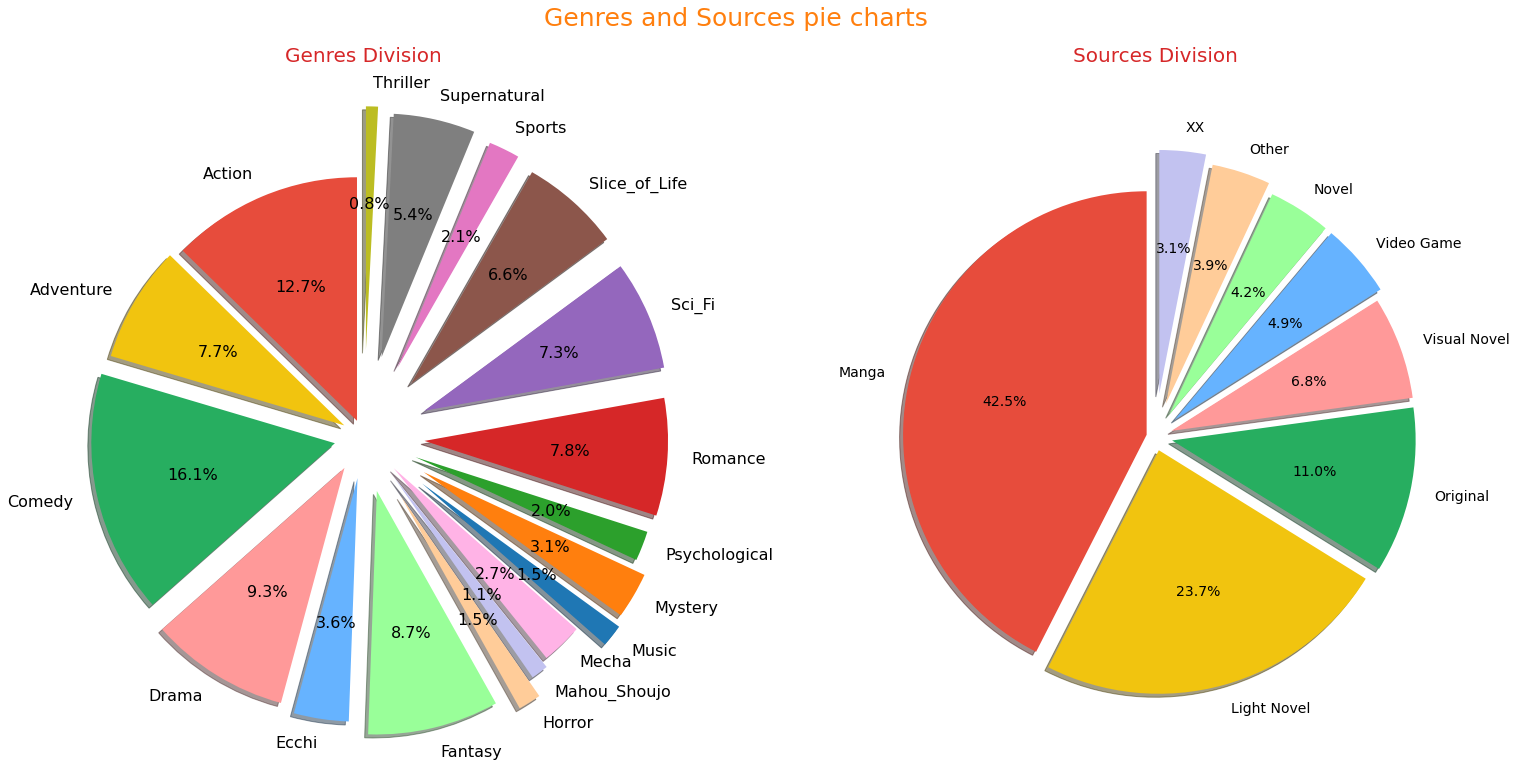

In [6]:
#More Usable colors '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'

genre_val = genre_sums.values.tolist()
genre_ind = ["Action","Adventure","Comedy","Drama","Ecchi",
               "Fantasy","Horror","Mahou_Shoujo","Mecha","Music",
               "Mystery","Psychological","Romance","Sci_Fi","Slice_of_Life"
               ,"Sports","Supernatural","Thriller"]
genre_colors = ['#E74C3C', '#F1C40F', '#27AE60','#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

sources_val = anime_df['source'].value_counts()
sources_val_relevant = sources_val.iloc[0:8]
source_val_list = sources_val_relevant.values.tolist()
source_ind = ['Manga', 'Light Novel', 'Original', 'Visual Novel', 'Video Game', 'Novel', 'Other', 'XX']
source_colors = ['#E74C3C', '#F1C40F', '#27AE60','#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']


#Joining the insignficiant categories with the 'Other' category.
#others_sum = 0
#i = 0
#for source in sources_val:
 #   if(source < 50):
  #      others_sum += source
   #     sources_val.drop(sources_val.index[i])
   # i += 1
#sources_val['Other'] = sources_val['Other'] + others_sum
#############################################################

fig, axs = plt.subplots(1,2, figsize=(26,8))

explode1 = (0.1, 0.13, 0.17, 0.21, 0.24, 0.32, 0.4, 0.29, 0.25, 0.43, 0.4, 0.32, 0.35, 0.38, 0.41, 0.44, 0.47, 0.5)
explode2 = (0.05, 0.08, 0.1, 0.1, 0.15, 0.15, 0.2, 0.25)

axs[0].pie(genre_val, labels=genre_ind, autopct='%1.1f%%', shadow=True, startangle=90,
              explode=explode1, radius=1.4, colors=genre_colors, textprops={'fontsize':16})
axs[1].pie(source_val_list, labels=source_ind, autopct='%1.1f%%', shadow=True,
            startangle=90, explode=explode2, radius=1.4, colors=source_colors, textprops={'fontsize':14})

axs[0].set_title("Genres Division", fontsize=20, y=1.35, color='#d62728')
axs[1].set_title("Sources Division", fontsize=20, y=1.35, color='#d62728')
fig.suptitle('Genres and Sources pie charts', fontsize=25, y=1.25, color='#ff7f0e')

In [7]:
#Creating a Crosstabulation of Drama and Action genres
drama_action_ct = pd.crosstab(genres_df['Drama'], genres_df['Action'])
drama_action_ct

Action,0,1
Drama,,
0,2714,1619
1,1020,595


Text(0, 0.5, 'Amounts')

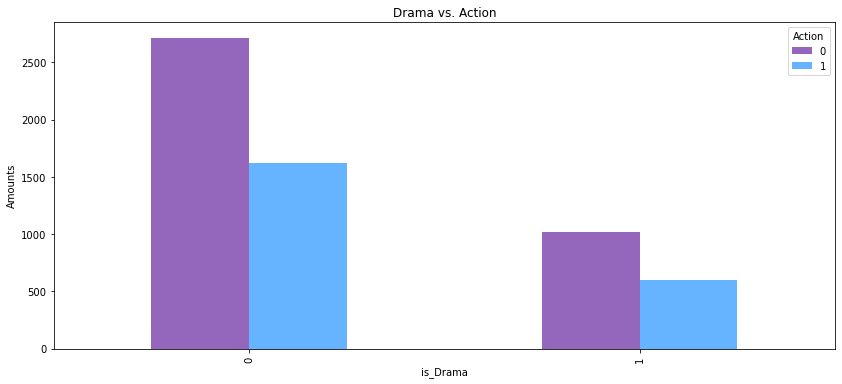

In [8]:
# Checking the correlation of Drama and Action.
drama_action_ct.plot(kind ='bar', figsize=(14,6), color=['#9467bd', '#66b3ff'])
plt.title('Drama vs. Action', fontsize=12)
plt.xlabel('is_Drama')
plt.ylabel('Amounts')
#, '#d62728', '#5D6D7E', , '#8c564b', '#2ca02c'  '#ff7f0e'

In [9]:
# Using Chi squared test to check if assumption H0 is valid,
# meaning both variables are not dependant on eachother.

from scipy.stats import chi2_contingency
chi2_contingency(drama_action_ct)

# According to our p-value - 0.733 > 0.05, H0 is indeed valid.

(0.11590861765648097,
 0.733514999682193,
 1,
 array([[2720.14492266, 1612.85507734],
        [1013.85507734,  601.14492266]]))

In [10]:
#Creating a Crosstabulation of Adventure and Comedy genres
adventure_comedy_ct = pd.crosstab(genres_df['Adventure'], genres_df['Comedy'])
adventure_comedy_ct

Comedy,0,1
Adventure,,
0,2368,2235
1,765,580


Text(0, 0.5, 'Amounts')

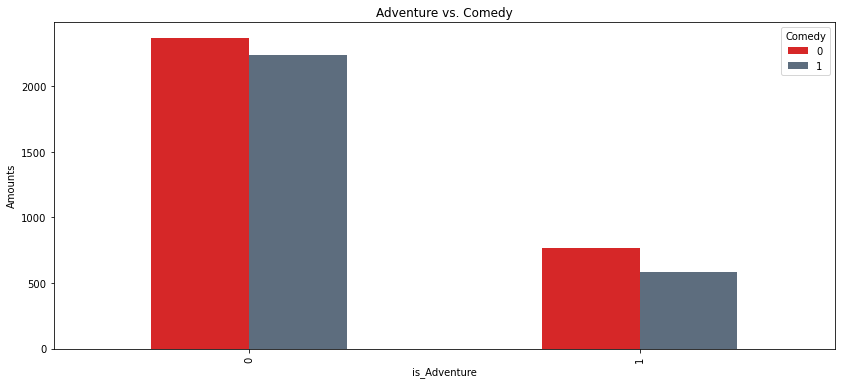

In [11]:
# Checking the correlation of Adventure and Comedy.
adventure_comedy_ct.plot(kind ='bar', figsize=(14,6), color=['#d62728', '#5D6D7E'])
plt.title('Adventure vs. Comedy', fontsize=12)
plt.xlabel('is_Adventure')
plt.ylabel('Amounts')

In [12]:
# Using Chi squared test to check if assumption H0 is valid,
# meaning both variables are not dependant on eachother.

from scipy.stats import chi2_contingency
chi2_contingency(adventure_comedy_ct)

# According to our p-value - 0.0005 < 0.05, H0 is not valid,
#and the variables ARE dependant on eachother.

(12.105939160664143,
 0.0005026147518160441,
 1,
 array([[2424.54589778, 2178.45410222],
        [ 708.45410222,  636.54589778]]))

In [13]:
#Creating a Crosstabulation of Action and Mean Score.
action_meanscore_ct = pd.crosstab(genres_df['Action'], anime_df['mean_score_binned'])
action_meanscore_ct

mean_score_binned,0,2,3,4,5,6,7,8,9,10
Action,,,,,,,,,,
0,128,3,7,16,111,562,1652,1072,181,2
1,84,2,2,10,58,307,952,673,125,1


Text(0, 0.5, 'Amounts of rated anime per category')

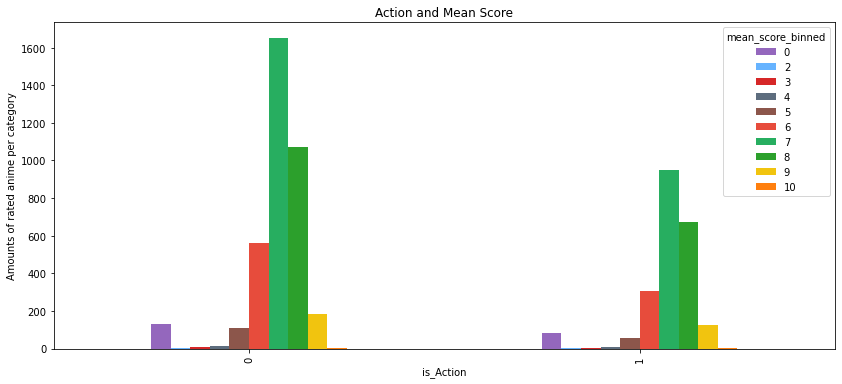

In [14]:
# we used value_counts() to make sure no anime was categorized with mean score 1.
action_meanscore_ct.plot(kind ='bar', figsize=(14,6), color=['#9467bd', '#66b3ff', '#d62728', '#5D6D7E', '#8c564b', '#E74C3C', '#27AE60', '#2ca02c', '#F1C40F', '#ff7f0e'])
plt.title('Action and Mean Score', fontsize=12)
plt.xlabel('is_Action')
plt.ylabel('Amounts of rated anime per category')

In [15]:
# Using Chi squared test to check if assumption H0 is valid,
# meaning both variables are not dependant on eachother.

from scipy.stats import chi2_contingency
chi2_contingency(action_meanscore_ct)

# According to our p-value - 0.642 > 0.05, H0 is indeed valid.

(6.950371342868021,
 0.6422865797250843,
 9,
 array([[1.33088097e+02, 3.13887021e+00, 5.64996638e+00, 1.63221251e+01,
         1.06093813e+02, 5.45535642e+02, 1.63472360e+03, 1.09546570e+03,
         1.92098857e+02, 1.88332213e+00],
        [7.89119032e+01, 1.86112979e+00, 3.35003362e+00, 9.67787492e+00,
         6.29061870e+01, 3.23464358e+02, 9.69276395e+02, 6.49534297e+02,
         1.13901143e+02, 1.11667787e+00]]))

<AxesSubplot:xlabel='Number Of Episodes'>

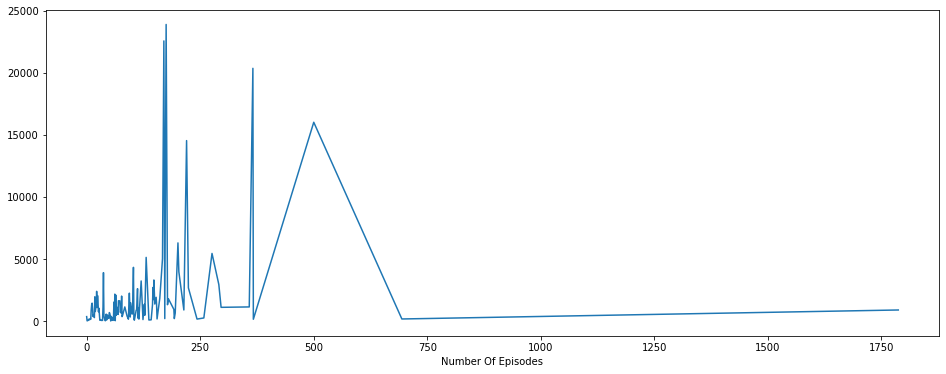

In [16]:
#Testing connection between the number of episodes of an anime, to the number of people who stopped watching.
line_plot1 = anime_df.groupby(['Number Of Episodes']).mean()['Dropped']
line_plot1.plot(figsize=(16,6))

<AxesSubplot:xlabel='Number Of Episodes'>

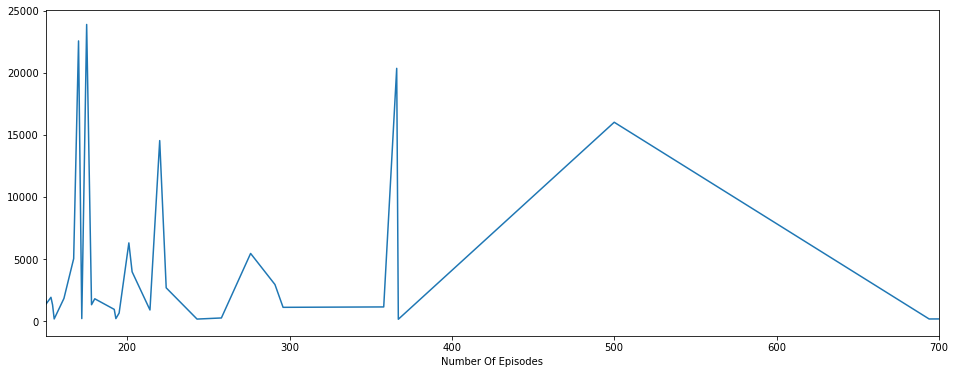

In [17]:
#Zooming in on the potential outliers
line_plot1 = anime_df.groupby(['Number Of Episodes']).mean()['Dropped']
line_plot1.plot(figsize=(16,6), xlim=[150,700])

550


C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Paused'>

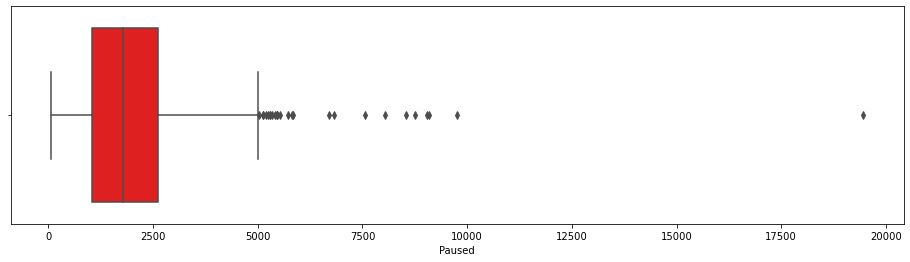

In [18]:
fig = plt.figure(figsize=(16,4))
dropped_zoomin = anime_df.iloc[150:700,15] #looking into the relevant part of 'Dropped' column
print(len(dropped_zoomin))
sns.boxplot(dropped_zoomin, whis=1.5, color='red')

In [19]:
#Q1 = np.percentile(anime_df['Dropped'], 25)
#Q3 = np.percentile(anime_df['Dropped'], 75)
#IQR = Q3 - Q1

#Dropped_outlier_rows = anime_df[(anime_df['Dropped']<(Q1 - 1.5*IQR)) | (anime_df['Dropped']>(Q3 + 1.5*IQR))].index
#print(len(Dropped_outlier_rows))

In [20]:
# We checked manually if the outliers make sense, and it seems they are. We knew beforehand that
# our data has a variety of anime, some more watched than others, and would also have a much higher drops rate,
# while others have little to no watchers.

<AxesSubplot:xlabel='Format', ylabel='Popularity'>

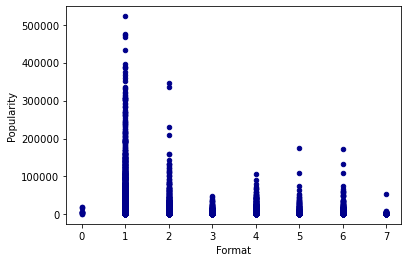

In [21]:
# Reminder: 0 - NaN, 1 - TV , 2 - Movie , 3 - Special , 4 - OVA , 5 - TV Short, 6 - ONA , 7 - Music.
anime_df.plot.scatter(x='Format',
                      y='Popularity',
                      c='DarkBlue')
#s='favorites',

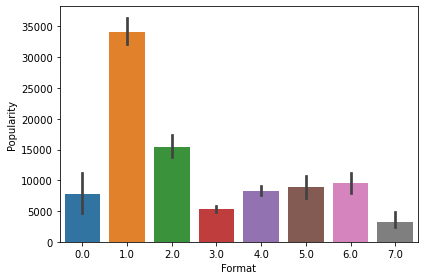

In [22]:
# Reminder: 0 - NaN, 1 - TV , 2 - Movie , 3 - Special , 4 - OVA , 5 - TV Short, 6 - ONA , 7 - Music.
sns.barplot(data=anime_df, x='Format', y='Popularity')#, hue='cond.'
plt.tight_layout()
plt.show()

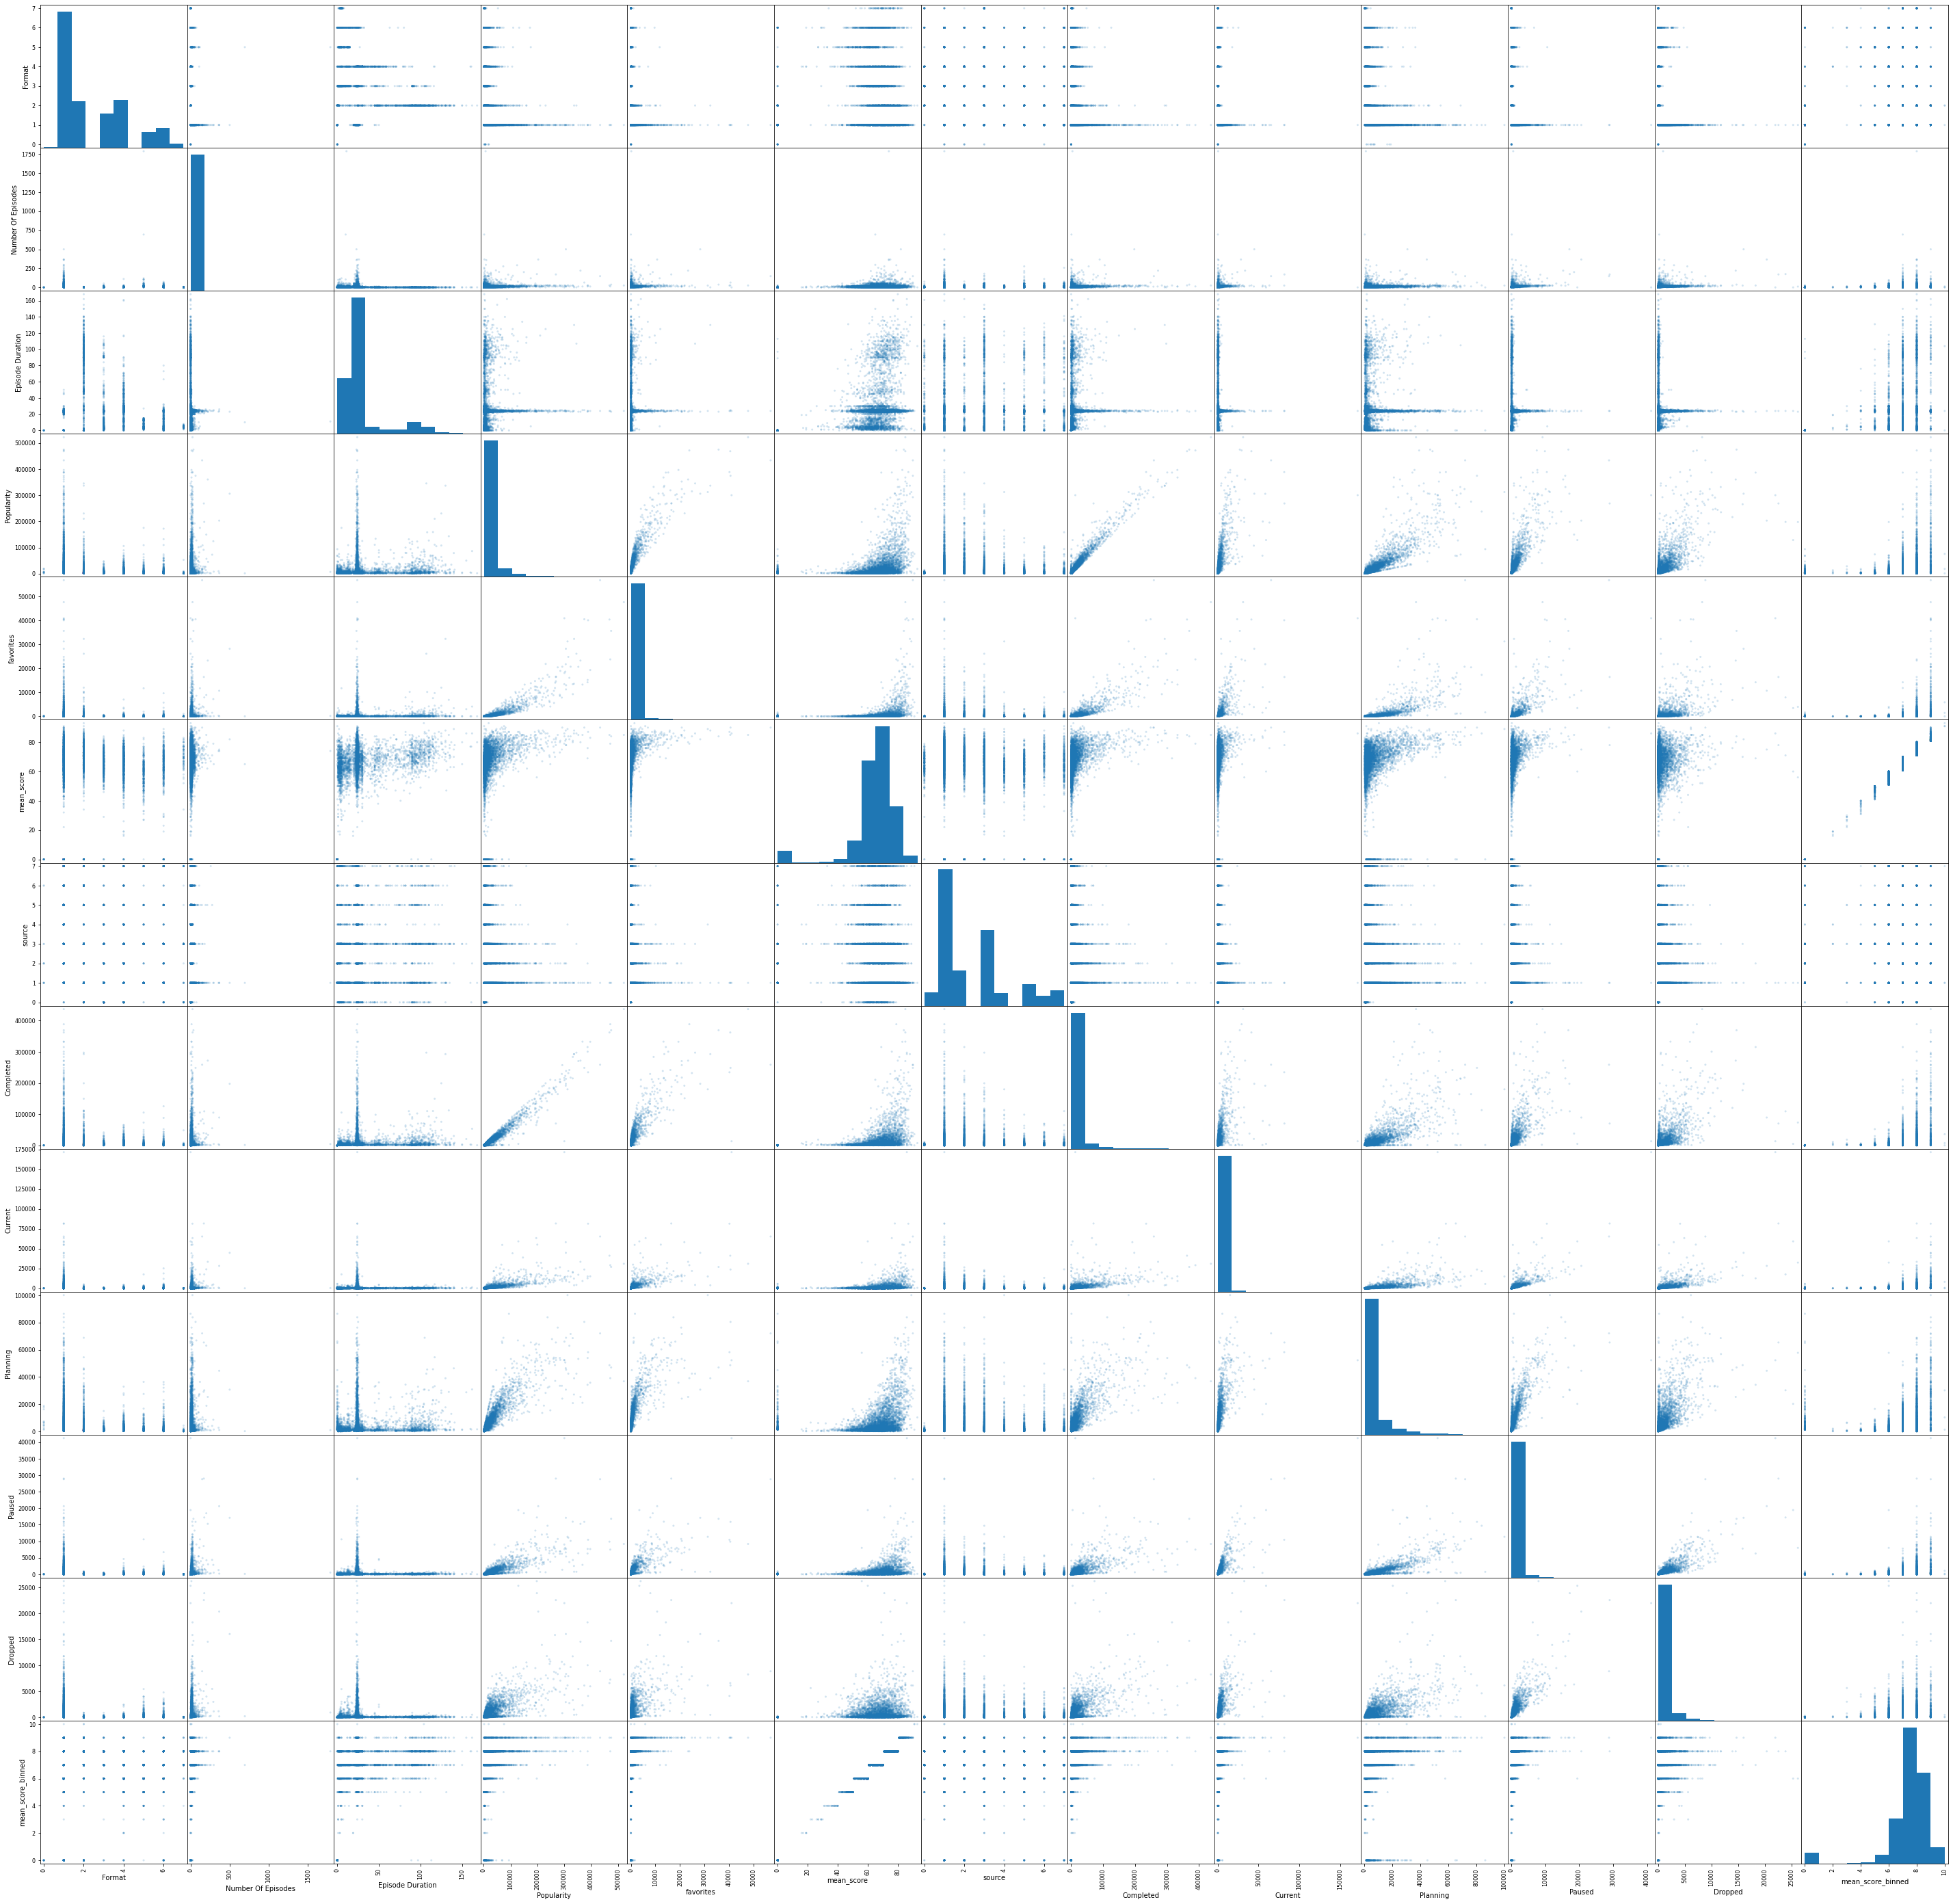

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(anime_df,alpha = 0.2, figsize = (50,50))
plt.show()

In [24]:
# Changing the following columns into percentage of the voters.
anime_df['Completed'] = (anime_df['Completed']/ anime_df['Popularity']*100)
anime_df['Current'] = (anime_df['Current']/ anime_df['Popularity']*100)
anime_df['Planning'] = (anime_df['Planning']/ anime_df['Popularity']*100)
anime_df['Paused'] = (anime_df['Paused']/ anime_df['Popularity']*100)
anime_df['Dropped'] = (anime_df['Dropped']/ anime_df['Popularity']*100)

anime_df

,anime_name,Format,Number Of Episodes,Episode Duration,status,Popularity,favorites,Studios,Genres,mean_score,source,Creator,Completed,Current,Planning,Paused,Dropped,mean_score_binned
0,Shingeki no Kyojin,1.0,25.0,24,Finished,522270.0,47674.0,Wit Studio,Action|Drama|Fantasy|Mystery,85.0,1.0,Hajime Isayama,83.672238,5.931606,7.054206,1.759818,1.582132,9
1,DEATH NOTE,1.0,37.0,23,Finished,474846.0,35688.0,MADHOUSE,Mystery|Psychological|Supernatural|Thriller,84.0,1.0,Tsugumi Ooba,77.784587,5.677630,9.898788,3.539674,3.099321,9
2,Boku no Hero Academia,1.0,13.0,24,Finished,471660.0,23789.0,bones,Action|Adventure|Comedy,79.0,1.0,Kouhei Horikoshi,82.391129,6.184964,8.296654,1.586736,1.540516,8
3,Kimetsu no Yaiba,1.0,26.0,24,Finished,468624.0,40432.0,ufotable,Action|Adventure|Drama|Fantasy|Supernatural,85.0,1.0,Koyoharu Gotouge,77.309314,8.787429,10.386152,2.108940,1.408165,9
4,HUNTER×HUNTER (2011),1.0,148.0,24,Finished,433766.0,56845.0,MADHOUSE,Action|Adventure|Fantasy,90.0,1.0,Yoshihiro Togashi,59.640682,15.065035,16.610338,6.639525,2.044420,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,NOMAD: Megalo Box 2 - Hachidori to tabibito.,3.0,1.0,0,Finished,1225.0,11.0,XX,XX,72.0,3.0,XX,6.612245,5.959184,85.387755,1.306122,0.734694,8
5944,The Big O (2003),1.0,13.0,24,Finished,1225.0,54.0,Sunrise,Action|Mecha|Mystery|Psychological|Sci-Fi,73.0,3.0,Hajime Yatate,66.775510,4.489796,26.612245,1.387755,0.734694,8
5945,Zoids Wild,1.0,50.0,25,Finished,1225.0,10.0,OLM,Action|Adventure|Mecha|Sci-Fi,51.0,3.0,Norihiko Sudo,12.816327,11.020408,50.693878,7.102041,18.367347,6
5946,Sanctuary,4.0,1.0,67,Finished,1225.0,9.0,Pastel,Action|Drama|Thriller,58.0,1.0,Yoshiyuki Okamura,41.061224,1.469388,54.857143,1.306122,1.306122,6


<AxesSubplot:xlabel='Completed', ylabel='Dropped'>

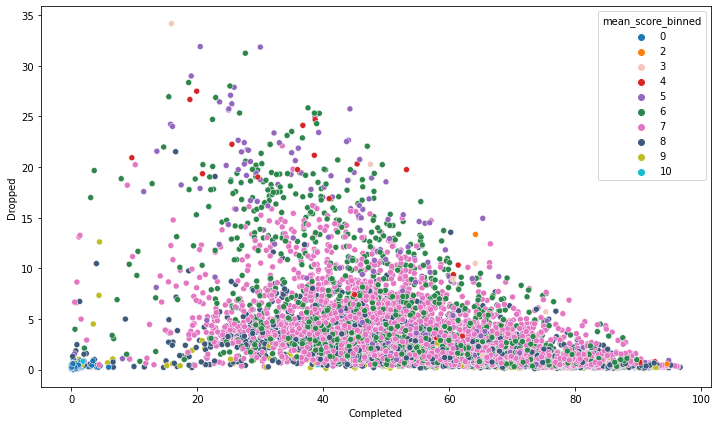

In [25]:
# This scatterplot shows the features Viewers drop rate vs. Viewers complete rate, also compared by the mean scores.
fig = plt.figure(figsize=(12,7))
colors=['#1f77b4', '#ff7f0e', '#f4c7bc', '#d62728', '#9467bd', '#2d864b', '#e377c2', '#3d5a7b', '#bcbd22', '#17becf']
sns.scatterplot(x=anime_df.Completed, y=anime_df.Dropped, hue=anime_df.mean_score_binned, palette=colors)

C:\Users\97254\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

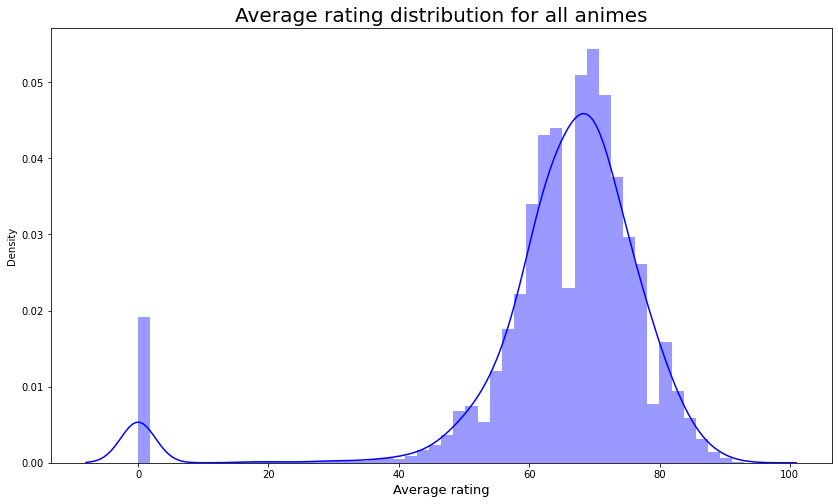

In [26]:
dist = anime_df
dist.mean_score_binned = dist.mean_score.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['mean_score_binned'],ax=ax,color='blue')
ax.set_title('Average rating distribution for all animes',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

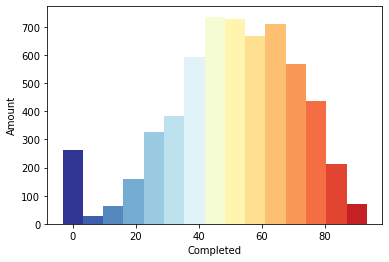

In [27]:
# A reminder that we changed a few specific columns into percentage, including 'Completed' and 'Planning'.

# This is the colormap we will use.
cm = plt.cm.get_cmap('RdYlBu_r')

Y,X = np.histogram(anime_df.Completed, 15)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]

plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.xlabel('Completed')
plt.ylabel('Amount')
plt.show()

# Remember that the 0 Column is NaN.

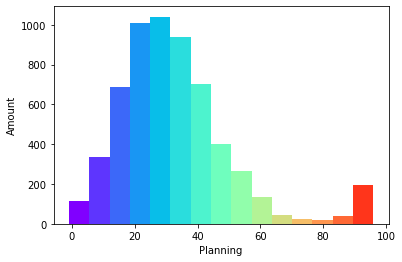

In [28]:
# This is the colormap we will use.
cm = plt.cm.get_cmap('rainbow')

Y,X = np.histogram(anime_df.Planning, 15)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]

plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.xlabel('Planning')
plt.ylabel('Amount')
plt.show()

# Remember that the 0 Column is NaN.

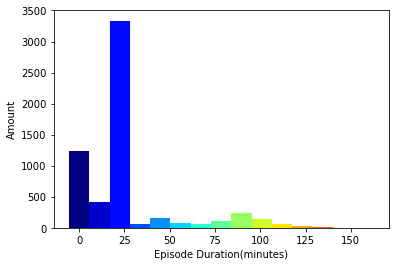

In [29]:
# This is the colormap we will use.
cm = plt.cm.get_cmap('jet')

Y,X = np.histogram(anime_df['Episode Duration'], 15)
x_span = X.max()-X.min()
C = [cm(((x-X.min())/x_span)) for x in X]

plt.bar(X[:-1],Y,color=C,width=X[1]-X[0])
plt.xlabel('Episode Duration(minutes)')
plt.ylabel('Amount')
plt.show()

# Remember that the 0 Column is NaN.